In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Import relevant classification model packages 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import xgboost

## Step 1: EDA

In [21]:
df = pd.read_csv('IBM HR Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
def missing_perc(df):
    """
    Function to calculate missing data % by column
    given a data frame
    """
    missing_df = pd.DataFrame()
    missing_df['Col Name'] = list(df.columns)
    missing_df['Missing %'] = [round(i/df.shape[0] * 100,2) for i in df.isnull().sum()]
    missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
    missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
    pd.set_option('display.max_rows', None)
    return missing_df

In [24]:
# Calculate missing data % per column
missing_perc(df)

,Col Name,Missing %
0,Age,0.0%
26,StandardHours,0.0%
20,NumCompaniesWorked,0.0%
21,Over18,0.0%
22,OverTime,0.0%
23,PercentSalaryHike,0.0%
24,PerformanceRating,0.0%
25,RelationshipSatisfaction,0.0%
27,StockOptionLevel,0.0%
18,MonthlyIncome,0.0%


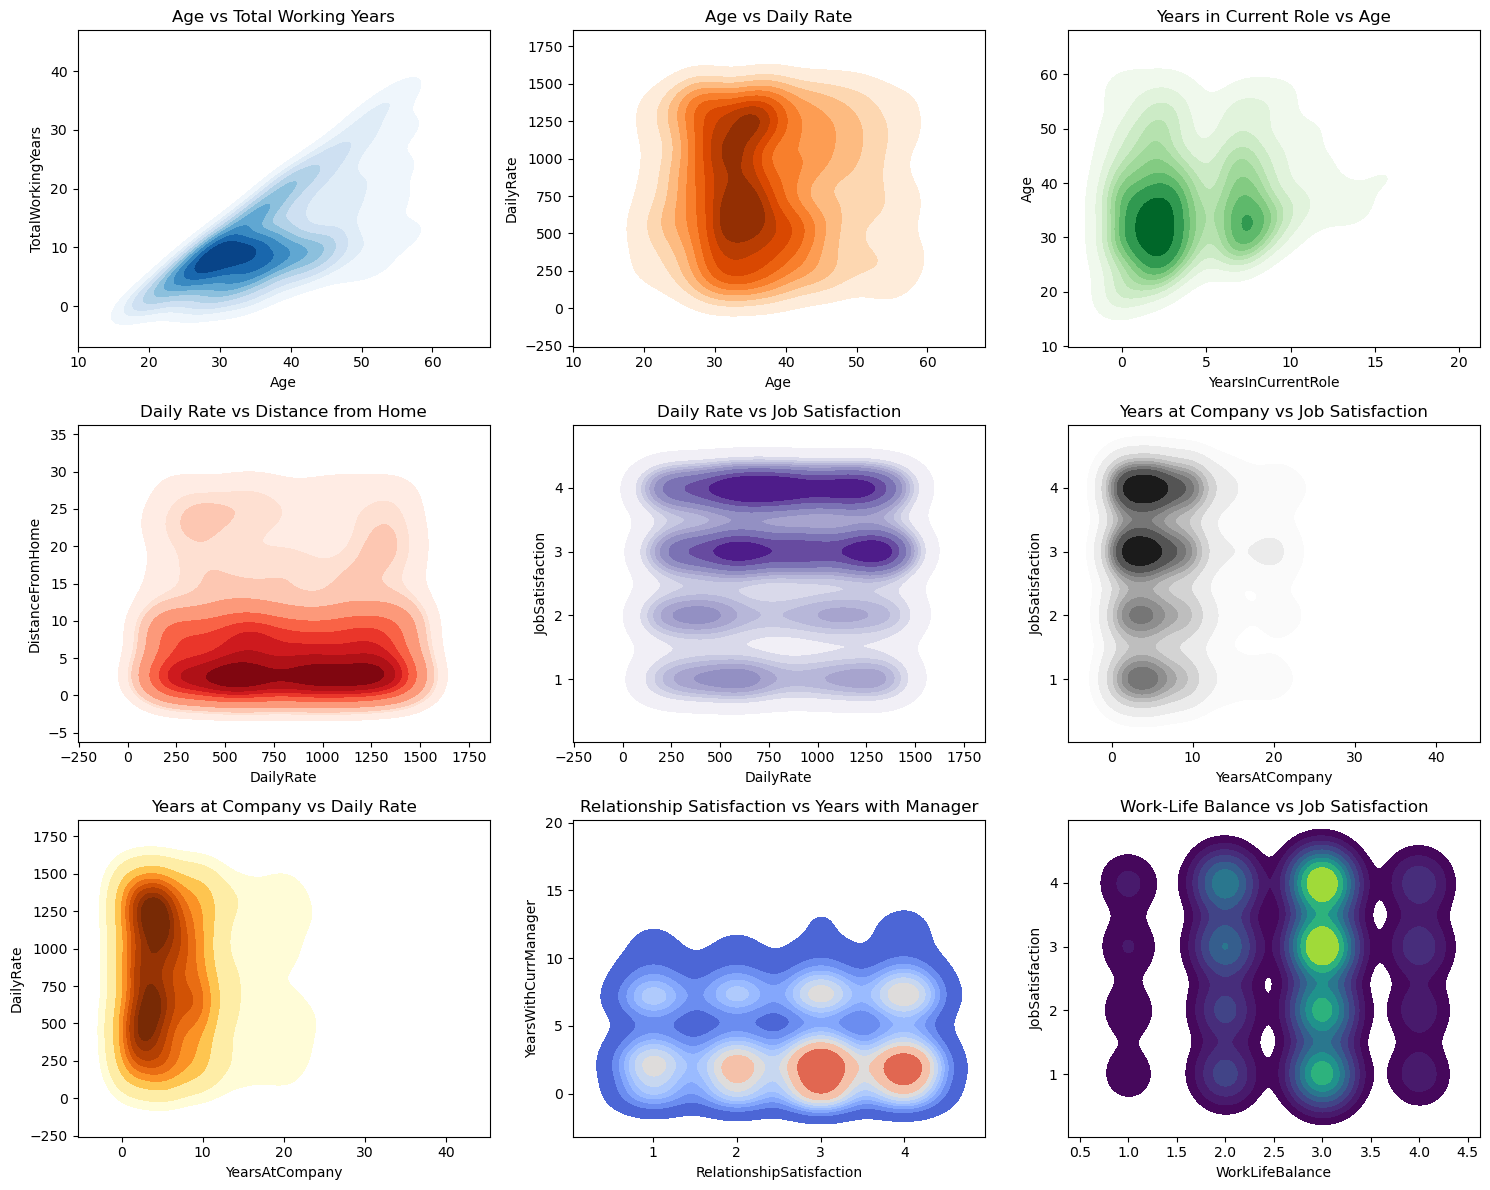

In [25]:
# Look at distribution for numerical variables

# Predefined colormaps for each plot
colormaps = [
    'Blues', 'Oranges', 'Greens', 'Reds', 'Purples',
    'Greys', 'YlOrBr', 'coolwarm', 'viridis'
]

# Define plot titles and corresponding dataframe columns
plot_config = [
    ('Age', 'TotalWorkingYears', 'Age vs Total Working Years'),
    ('Age', 'DailyRate', 'Age vs Daily Rate'),
    ('YearsInCurrentRole', 'Age', 'Years in Current Role vs Age'),
    ('DailyRate', 'DistanceFromHome', 'Daily Rate vs Distance from Home'),
    ('DailyRate', 'JobSatisfaction', 'Daily Rate vs Job Satisfaction'),
    ('YearsAtCompany', 'JobSatisfaction', 'Years at Company vs Job Satisfaction'),
    ('YearsAtCompany', 'DailyRate', 'Years at Company vs Daily Rate'),
    ('RelationshipSatisfaction', 'YearsWithCurrManager', 'Relationship Satisfaction vs Years with Manager'),
    ('WorkLifeBalance', 'JobSatisfaction', 'Work-Life Balance vs Job Satisfaction')
]

# Create a 3x3 subplot structure
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the plot configuration to create each subplot
for i, (x_col, y_col, title) in enumerate(plot_config):
    sns.kdeplot(x=df[x_col], y=df[y_col], shade=True, cmap=colormaps[i], ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

# Adjust the layout
plt.tight_layout()
plt.show()

In [26]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

In [27]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [28]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']



## Feature Engineering

In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numerical'],
      dtype='object')

In [35]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = df.drop(['Attrition_numerical'], axis=1)


categorical = []
for col in attrition.columns:
    if attrition[col].dtype == 'object':
        categorical.append(col)


# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [36]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition.drop(['Attrition'], axis=1) # Dropping the target column

In [37]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True


In [38]:
# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

In [39]:
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [40]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [41]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

In [43]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

In [44]:
from imblearn.over_sampling import SMOTE

In [46]:
# Create SMOTE object
oversampler = SMOTE(random_state=0)

# Use fit_resample instead of fit_sample
smote_train, smote_target = oversampler.fit_resample(train, target_train)


In [48]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [49]:
rf = RandomForestClassifier(**rf_params)

In [51]:
rf.fit(smote_train, smote_target)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [52]:
rf_predictions = rf.predict(test)

In [53]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       245
           1       0.53      0.47      0.50        49

    accuracy                           0.84       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.84      0.84      0.84       294



In [54]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree

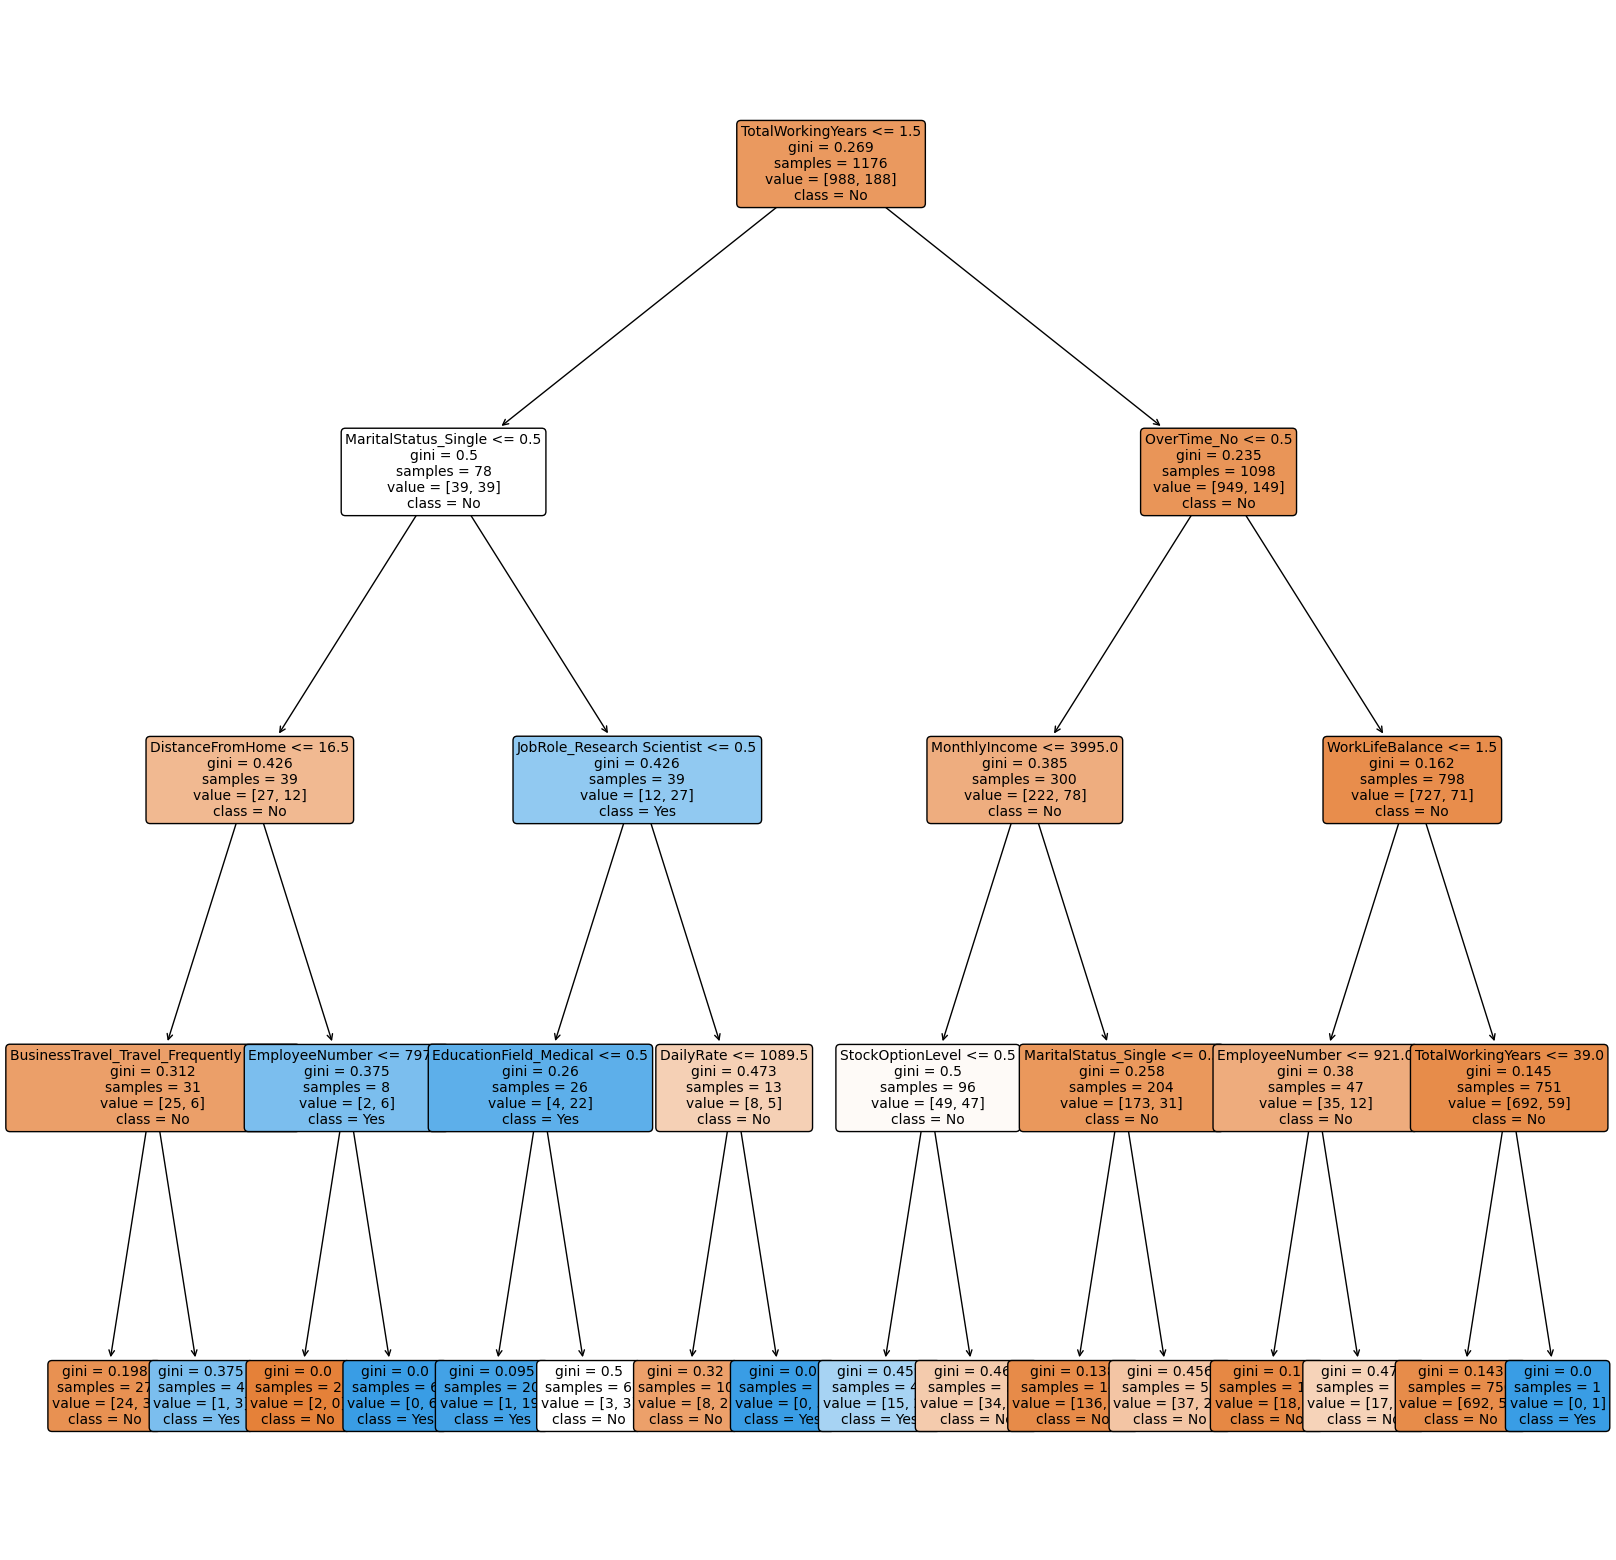

In [79]:
# Set the size of the figure
plt.figure(figsize=(20, 20))  # Adjust the size to fit your tree

# Plot the decision tree
tree_plot = tree.plot_tree(
    decision_tree,
    feature_names=attrition_final.columns.values, 
    class_names=['No', 'Yes'],  
    filled=True, 
    rounded=True, 
    fontsize=10)  # Adjust font size to fit the space

# Save the plot to a high-resolution file
plt.savefig('decision_tree_high_res.png', format='png', dpi=300, bbox_inches='tight')

# Optionally show the plot in the output
plt.show()

In [80]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [81]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)


In [82]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294

